# Imporing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import roc_curve

# Impoting the DataSet

In [3]:
df = pd.read_csv("climber_df.csv")

In [4]:
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 11000)
pd.set_option('display.width', 11000)

# Performing EDA On DataSets

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10927 entries, 0 to 10926
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       10927 non-null  int64  
 1   country       10927 non-null  object 
 2   sex           10927 non-null  int64  
 3   height        10927 non-null  int64  
 4   weight        10927 non-null  int64  
 5   age           10927 non-null  float64
 6   years_cl      10927 non-null  int64  
 7   date_first    10927 non-null  object 
 8   date_last     10927 non-null  object 
 9   grades_count  10927 non-null  int64  
 10  grades_first  10927 non-null  int64  
 11  grades_last   10927 non-null  int64  
 12  grades_max    10927 non-null  int64  
 13  grades_mean   10927 non-null  float64
 14  year_first    10927 non-null  int64  
 15  year_last     10927 non-null  int64  
dtypes: float64(2), int64(11), object(3)
memory usage: 1.3+ MB


In [6]:
df.isna().sum()

user_id         0
country         0
sex             0
height          0
weight          0
age             0
years_cl        0
date_first      0
date_last       0
grades_count    0
grades_first    0
grades_last     0
grades_max      0
grades_mean     0
year_first      0
year_last       0
dtype: int64

In [7]:
df.describe()

,user_id,sex,height,weight,age,years_cl,grades_count,grades_first,grades_last,grades_max,grades_mean,year_first,year_last
count,10927.00000,10927.000000,10927.000000,10927.000000,10927.000000,10927.000000,10927.000000,10927.000000,10927.000000,10927.000000,10927.000000,10927.000000,10927.000000
mean,29411.09774,0.125103,176.152009,67.608676,33.333852,12.672188,79.794546,45.648851,46.983802,53.764437,45.505055,2008.621946,2012.311613
std,18022.12695,0.330851,8.508669,9.677316,7.590989,6.108451,141.411297,9.478173,9.418087,9.679533,7.891356,28.833298,4.161484
min,1.00000,0.000000,137.000000,40.000000,12.000000,1.000000,1.000000,28.000000,28.000000,29.000000,28.500000,0.000000,1991.000000
25%,14651.00000,0.000000,171.000000,63.000000,28.000000,8.000000,8.000000,38.000000,40.000000,46.000000,39.400000,2006.000000,2009.000000
50%,27323.00000,0.000000,177.000000,68.000000,33.000000,12.000000,28.000000,46.000000,48.000000,55.000000,45.151899,2009.000000,2013.000000
75%,43240.50000,0.000000,182.000000,73.000000,38.000000,17.000000,90.000000,53.000000,53.000000,62.000000,51.210084,2012.000000,2016.000000
max,67020.00000,1.000000,202.000000,93.000000,69.000000,29.000000,2445.000000,75.000000,77.000000,77.000000,75.272727,2017.000000,2017.000000


In [8]:
df.shape

(10927, 16)

In [9]:
df.head()

,user_id,country,sex,height,weight,age,years_cl,date_first,date_last,grades_count,grades_first,grades_last,grades_max,grades_mean,year_first,year_last
0,1,SWE,0,177,73,41.0,21,1999-02-06 23:00:00,2001-07-31 22:00:00,84,36,55,62,46.750000,1999,2001
1,3,SWE,0,180,78,44.0,22,1999-03-31 22:00:00,2000-07-19 22:00:00,12,53,51,59,52.833333,1999,2000
2,4,SWE,1,165,58,33.0,16,2004-06-30 22:00:00,2009-05-26 22:00:00,119,53,49,64,53.890756,2004,2009
3,10,SWE,0,167,63,52.0,25,2000-01-14 23:00:00,2017-06-01 22:00:00,298,53,49,63,49.406040,2000,2017
4,16,NOR,0,177,68,44.0,21,1998-02-27 23:00:00,2010-05-13 22:00:00,5,53,49,53,51.400000,1998,2010


In [10]:
df["country"].value_counts()

ESP      1306
USA      1248
other     984
POL       830
ITA       798
SWE       632
FRA       607
DEU       505
BRA       427
NOR       355
AUT       337
ZAF       323
CAN       306
RUS       266
AUS       244
NLD       233
GBR       228
CHE       225
PRT       185
BEL       176
HRV       163
SVN       148
MEX       146
DNK       119
CZE        78
FIN        58
Name: country, dtype: int64

In [11]:
df["sex"].value_counts()

0    9560
1    1367
Name: sex, dtype: int64

In [12]:
df["height"].value_counts()

180    944
178    803
175    725
170    672
183    528
182    491
176    450
172    448
173    438
174    409
185    403
177    357
179    337
181    299
168    288
165    258
184    249
186    248
169    198
171    191
187    189
190    184
167    182
160    180
188    171
189    122
163    121
164    119
162     89
166     80
192     76
158     63
193     55
191     51
157     46
159     46
155     45
161     44
195     42
194     34
156     29
152     29
153     26
150     25
154     21
196     19
140     14
197     13
198     13
145     12
200     11
148      7
151      6
149      5
146      4
142      4
143      3
138      3
144      2
137      2
147      2
202      1
139      1
Name: height, dtype: int64

In [13]:
df["Year_Active"] = df["year_last"]- df["year_first"]

In [14]:
df["Good_meanscore"] =df.grades_mean > 40 

In [15]:
df["Good_meanscore"] = df["Good_meanscore"].astype(int)

In [16]:
df.head()

,user_id,country,sex,height,weight,age,years_cl,date_first,date_last,grades_count,grades_first,grades_last,grades_max,grades_mean,year_first,year_last,Year_Active,Good_meanscore
0,1,SWE,0,177,73,41.0,21,1999-02-06 23:00:00,2001-07-31 22:00:00,84,36,55,62,46.750000,1999,2001,2,1
1,3,SWE,0,180,78,44.0,22,1999-03-31 22:00:00,2000-07-19 22:00:00,12,53,51,59,52.833333,1999,2000,1,1
2,4,SWE,1,165,58,33.0,16,2004-06-30 22:00:00,2009-05-26 22:00:00,119,53,49,64,53.890756,2004,2009,5,1
3,10,SWE,0,167,63,52.0,25,2000-01-14 23:00:00,2017-06-01 22:00:00,298,53,49,63,49.406040,2000,2017,17,1
4,16,NOR,0,177,68,44.0,21,1998-02-27 23:00:00,2010-05-13 22:00:00,5,53,49,53,51.400000,1998,2010,12,1


In [17]:
df["Year_Active"].value_counts()

 0       3041
 1       1570
 2       1179
 3        885
 4        785
 5        629
 6        506
 7        502
 8        402
 9        318
 10       249
 11       184
-1        153
 12       151
 13        99
 14        56
 15        52
-2         40
 16        31
-3         23
 17        21
-4         14
-5          8
 18         4
 22         4
 19         3
-6          3
 21         2
-14         2
-12         1
 23         1
 921        1
-10         1
 24         1
-17         1
 20         1
 2005       1
 2012       1
 26         1
-16         1
Name: Year_Active, dtype: int64

In [18]:
df['Year_Active'] = df['Year_Active'].abs()

In [19]:
mio = math.floor(df['Year_Active'].mean())
mio

3

In [20]:
df = df[df.Year_Active < 30]

In [21]:
df["Good_meanscore"].value_counts()

1    7871
0    3053
Name: Good_meanscore, dtype: int64

In [22]:
df.shape

(10924, 18)

In [23]:
df['age'] =  df['age'].astype('int64')
df['grades_mean'] =  df['grades_mean'].astype('int64')

In [24]:
df['age']

0        41
1        44
2        33
3        52
4        44
5        42
6        36
7        45
8        21
9        35
10       45
11       42
12       39
13       36
14       35
15       40
16       47
17       43
18       41
19       45
20       46
21       42
22       44
23       36
24       48
25       40
26       42
27       48
28       48
29       42
30       39
31       45
32       42
33       42
34       47
35       35
36       46
37       39
38       44
39       37
40       32
41       44
42       36
43       40
44       44
45       38
46       51
47       38
48       31
49       37
50       40
51       36
52       29
53       45
54       41
55       44
56       37
57       41
58       34
59       47
60       42
61       39
62       40
63       35
64       39
65       43
66       38
67       44
68       35
69       32
70       49
71       44
72       44
73       32
74       39
75       36
76       44
77       31
78       44
79       49
80       37
81       37
82       46
83  

In [25]:
df['grades_max']

0        62
1        59
2        64
3        63
4        53
5        36
6        49
7        64
8        53
9        71
10       53
11       44
12       44
13       62
14       62
15       62
16       62
17       66
18       59
19       53
20       66
21       53
22       38
23       77
24       55
25       62
26       59
27       55
28       70
29       66
30       62
31       66
32       51
33       62
34       68
35       66
36       55
37       64
38       68
39       66
40       64
41       55
42       44
43       72
44       70
45       67
46       62
47       51
48       42
49       75
50       49
51       72
52       53
53       59
54       55
55       62
56       59
57       70
58       64
59       44
60       62
61       59
62       62
63       66
64       62
65       53
66       49
67       66
68       62
69       71
70       53
71       62
72       72
73       65
74       59
75       57
76       66
77       77
78       62
79       57
80       70
81       75
82       42
83  

In [26]:
df["Year_Active"].value_counts()

0     3041
1     1723
2     1219
3      908
4      799
5      637
6      509
7      502
8      402
9      318
10     250
11     184
12     152
13      99
14      58
15      52
16      32
17      22
18       4
22       4
19       3
21       2
26       1
24       1
20       1
23       1
Name: Year_Active, dtype: int64

In [27]:
df["age"].value_counts()

33    615
31    596
32    592
35    552
29    547
30    542
36    513
28    513
34    496
37    474
27    457
40    413
38    408
26    400
39    374
25    339
41    323
42    292
24    254
43    249
22    217
23    212
44    212
45    149
21    144
46    134
20    120
47    108
48     96
19     90
49     64
18     55
50     53
17     51
51     41
52     31
53     24
16     23
14     20
15     18
54     18
55     13
13     13
12     12
57     12
56     11
58      7
59      7
64      5
61      4
65      3
60      2
62      2
66      1
63      1
68      1
69      1
Name: age, dtype: int64

In [28]:
df["grades_max"].value_counts()

62    1031
57     863
53     858
55     781
49     758
51     732
59     713
64     639
66     522
44     494
46     461
42     410
40     362
68     318
36     299
38     291
70     207
33     159
72     102
61      73
58      65
31      60
56      59
75      56
50      56
54      56
52      56
48      53
29      49
63      46
65      42
45      32
39      29
43      28
67      24
69      24
41      19
37      19
35      18
77      16
71      16
32      13
74       7
30       6
76       2
Name: grades_max, dtype: int64

In [29]:
df["height"].value_counts()

180    944
178    802
175    725
170    672
183    528
182    490
176    450
172    448
173    438
174    409
185    403
177    357
179    337
181    299
168    287
165    258
184    249
186    248
169    198
171    191
187    189
190    184
167    182
160    180
188    171
189    122
163    121
164    119
162     89
166     80
192     76
158     63
193     55
191     51
157     46
159     46
155     45
161     44
195     42
194     34
156     29
152     29
153     26
150     25
154     21
196     19
140     14
197     13
198     13
145     12
200     11
148      7
151      6
149      5
146      4
142      4
143      3
138      3
144      2
137      2
147      2
202      1
139      1
Name: height, dtype: int64

In [32]:
tar = df['country'].value_counts()

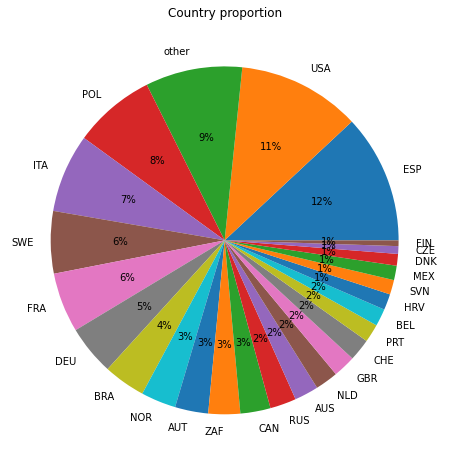

In [33]:
plt.figure(figsize=(8, 8))
plt.pie(tar.values, labels=tar.index, autopct = '%0.0f%%')
plt.title('Country proportion')
plt.show()

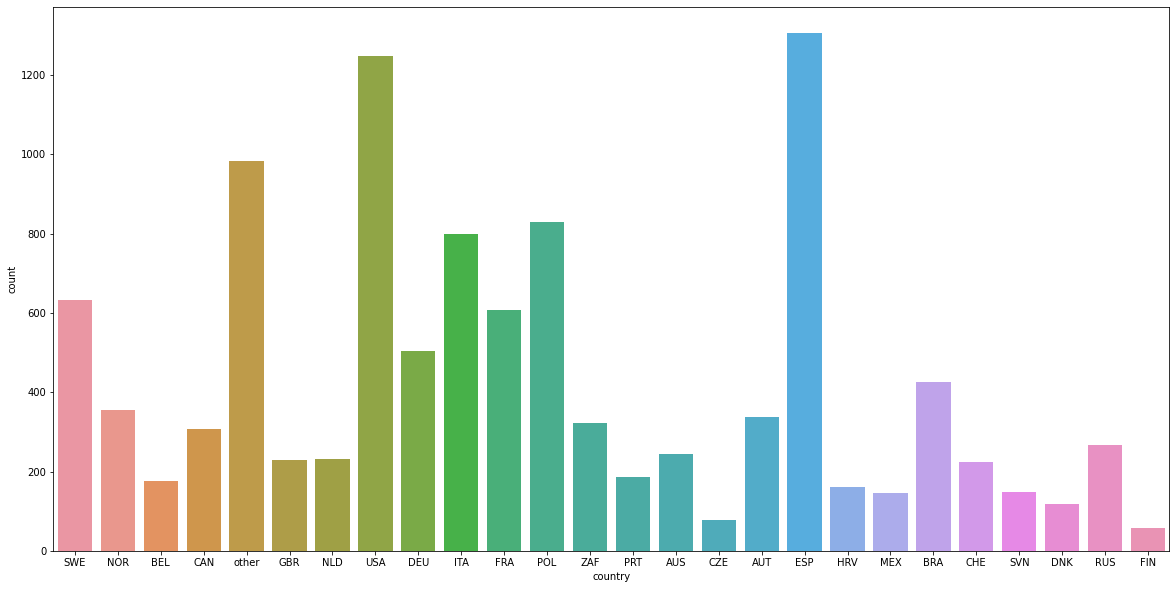

In [37]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='country',data=df)
plt.xticks(size=10);
plt.show()

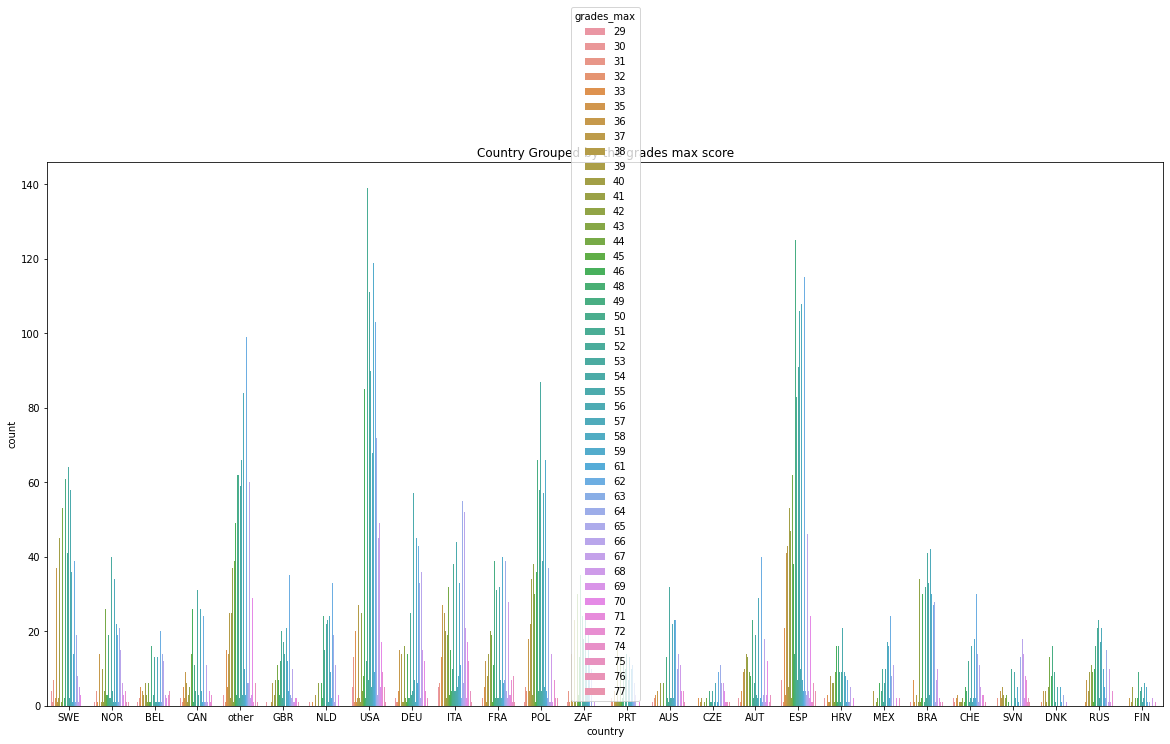

In [38]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='country', hue='grades_max',data=df)
plt.xticks(size=10);
plt.title("Country Grouped by the grades max score")
plt.show()

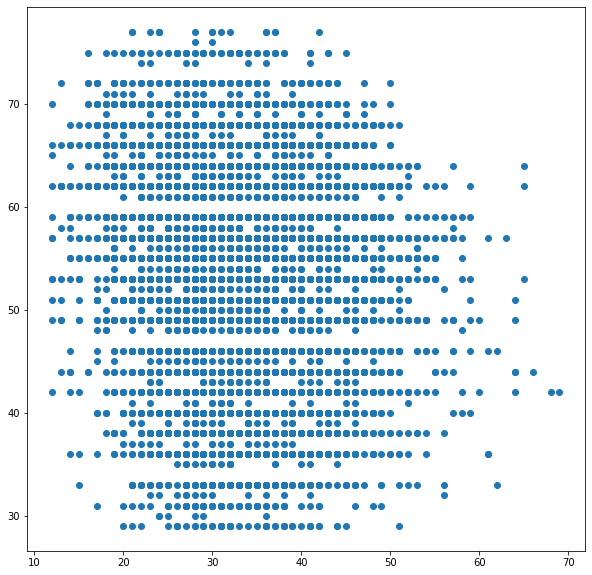

In [31]:
plt.figure(figsize = (10,10))
plt.scatter(df['age'],df['grades_max'])
plt.show()

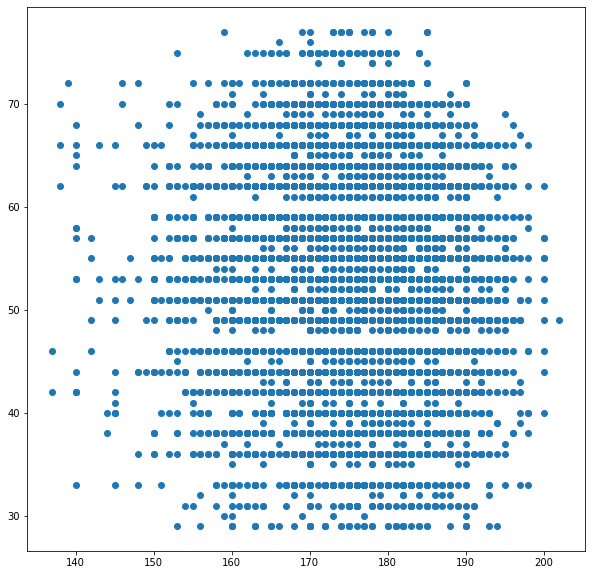

In [32]:
plt.figure(figsize = (10,10))
plt.scatter(df['height'],df['grades_max'])
plt.show()

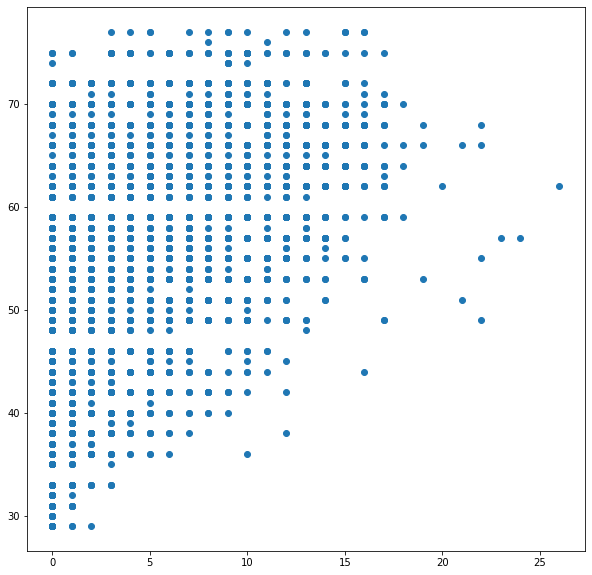

In [33]:
plt.figure(figsize = (10,10))
plt.scatter(df['Year_Active'],df['grades_max'])
plt.show()

# Preparing TesT, Train Data

In [39]:
df_data = df[['sex','height','weight','age','Year_Active']]

df_target = df[['Good_meanscore']]

In [40]:
df_data.head()

,sex,height,weight,age,Year_Active
0,0,177,73,41,2
1,0,180,78,44,1
2,1,165,58,33,5
3,0,167,63,52,17
4,0,177,68,44,12


In [41]:
df_target.head()

,Good_meanscore
0,1
1,1
2,1
3,1
4,1


In [42]:
X_train,X_test,Y_train,Y_test = train_test_split(df_data, df_target, train_size=0.8)

In [43]:
X_train

,sex,height,weight,age,Year_Active
6011,0,170,63,39,4
9697,0,183,78,34,0
2873,0,183,73,37,0
10081,0,145,40,14,1
10034,0,168,53,28,0
494,0,172,63,38,0
3743,1,162,48,24,2
790,0,179,78,40,4
10147,0,190,83,27,2
7121,0,186,83,29,1


# Appling Algorithms On Datasets

# LinearRegression

In [44]:
from sklearn import linear_model

lin= linear_model.LinearRegression()
lin.fit(X_train, Y_train)

LinearRegression()

In [45]:
lin_reg = lin.predict(X_test)

lin_reg

array([[0.52158518],
       [0.99002407],
       [0.58149689],
       ...,
       [0.44726109],
       [0.43586448],
       [0.73580046]])

In [46]:
lin.coef_

array([[-0.23783032,  0.00464895, -0.01133677, -0.00403646,  0.03349396]])

In [47]:
lin.intercept_

array([0.71990429])

In [48]:
print("mean_absolute_error of Linear_Regression: ",  mean_absolute_error(Y_test , lin_reg))
print("mean_squared_error of Linear_Regression: ",  mean_squared_error(Y_test , lin_reg))
print("Score of Linear_Regression: ",  lin.score(X_test,Y_test))
print("Sqaureroot of Mean_squared_error of Linear_Regression: ",  np.sqrt(mean_squared_error(Y_test , lin_reg)))

mean_absolute_error of Linear_Regression:  0.35834285330427906
mean_squared_error of Linear_Regression:  0.17447344087260686
Score of Linear_Regression:  0.12591271540640336
Sqaureroot of Mean_squared_error of Linear_Regression:  0.41770018059920305


<function matplotlib.pyplot.show(close=None, block=None)>

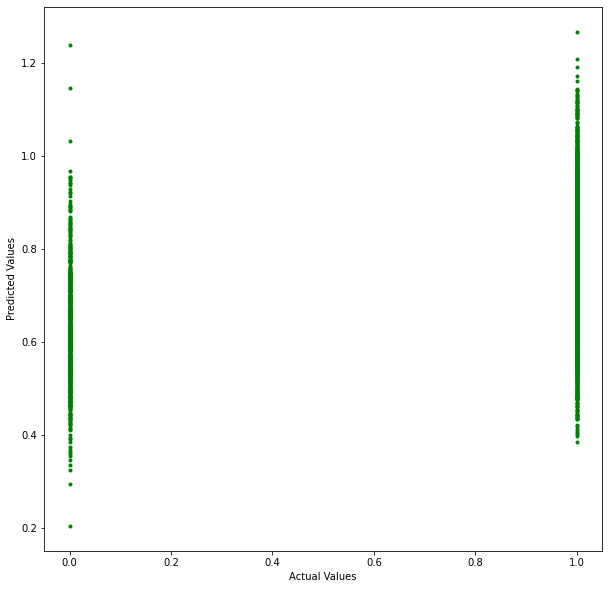

In [49]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test,lin_reg, marker ='.', color = 'Green')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show

# DecisionTreeClassifier

In [50]:
DT= tree.DecisionTreeClassifier(max_depth=3, random_state=42)


In [51]:
DT.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [52]:
DT_reg = DT.predict(X_test)

DT_reg

array([0, 1, 0, ..., 1, 0, 1])

In [53]:
DT.tree_

In [54]:
print("mean_absolute_error of DecisionTreeClassifier: ",  mean_absolute_error(Y_test , DT_reg))
print("mean_squared_error of DecisionTreeClassifier: ",  mean_squared_error(Y_test , DT_reg))
print("Score of DecisionTreeClassifier: ",  DT.score(X_test,Y_test))
print("Sqaureroot of Mean_squared_error of DecisionTreeClassifier: ",  np.sqrt(mean_squared_error(Y_test , DT_reg)))

mean_absolute_error of DecisionTreeClassifier:  0.2622425629290618
mean_squared_error of DecisionTreeClassifier:  0.2622425629290618
Score of DecisionTreeClassifier:  0.7377574370709382
Sqaureroot of Mean_squared_error of DecisionTreeClassifier:  0.5120962438146386


[Text(0.5, 0.875, 'X[4] <= 1.5\ngini = 0.404\nsamples = 8739\nvalue = [2451, 6288]'),
 Text(0.25, 0.625, 'X[2] <= 75.5\ngini = 0.487\nsamples = 3793\nvalue = [1588, 2205]'),
 Text(0.125, 0.375, 'X[0] <= 0.5\ngini = 0.472\nsamples = 3007\nvalue = [1145, 1862]'),
 Text(0.0625, 0.125, 'gini = 0.452\nsamples = 2481\nvalue = [856, 1625]'),
 Text(0.1875, 0.125, 'gini = 0.495\nsamples = 526\nvalue = [289, 237]'),
 Text(0.375, 0.375, 'X[4] <= 0.5\ngini = 0.492\nsamples = 786\nvalue = [443, 343]'),
 Text(0.3125, 0.125, 'gini = 0.479\nsamples = 514\nvalue = [310, 204]'),
 Text(0.4375, 0.125, 'gini = 0.5\nsamples = 272\nvalue = [133, 139]'),
 Text(0.75, 0.625, 'X[4] <= 5.5\ngini = 0.288\nsamples = 4946\nvalue = [863, 4083]'),
 Text(0.625, 0.375, 'X[2] <= 75.5\ngini = 0.347\nsamples = 2861\nvalue = [638, 2223]'),
 Text(0.5625, 0.125, 'gini = 0.313\nsamples = 2333\nvalue = [453, 1880]'),
 Text(0.6875, 0.125, 'gini = 0.455\nsamples = 528\nvalue = [185, 343]'),
 Text(0.875, 0.375, 'X[3] <= 31.5\ngini

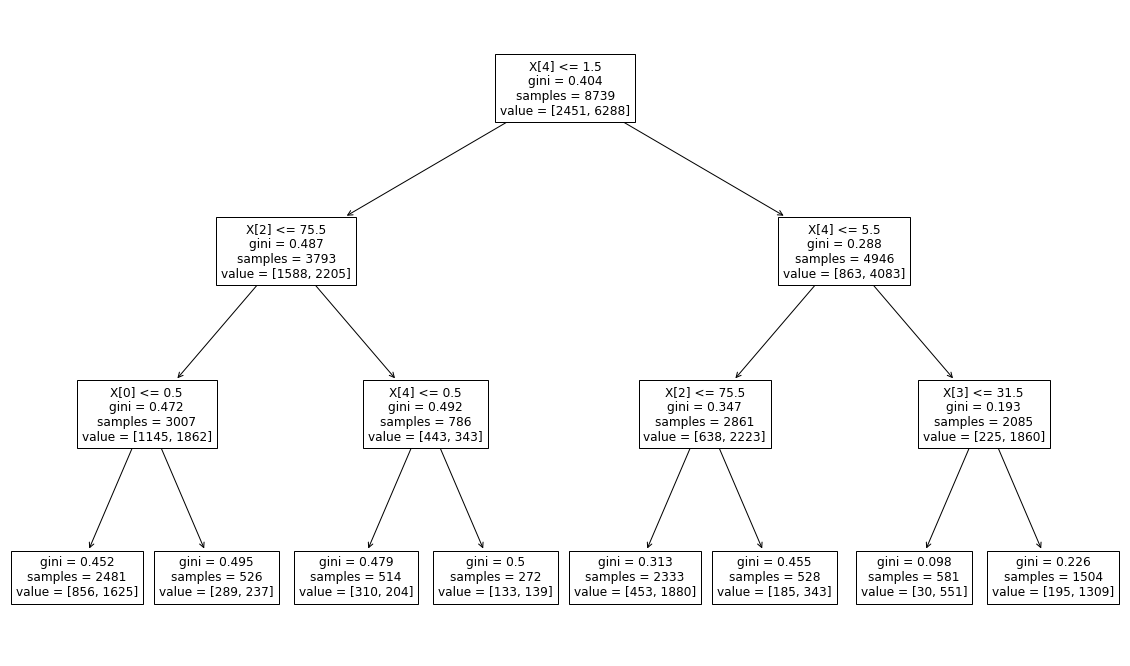

In [55]:
plt.figure(figsize= (20,12))
tree.plot_tree(DT)

# KNeighborsClassifier

In [56]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, Y_train)

C:\Users\Danish Iqbal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [57]:
knn.ped = knn.predict(X_test)
knn.ped

array([1, 1, 0, ..., 0, 0, 1])

In [58]:
print("mean_absolute_error of KNeighborsClassifier: ",  mean_absolute_error(Y_test , knn.ped))
print("mean_squared_error of KNeighborsClassifier: ",  mean_squared_error(Y_test , knn.ped))
print("Score of KNeighborsClassifier: ",  knn.score(X_test,Y_test))
print("Sqaureroot of Mean_squared_error of KNeighborsClassifier: ",  np.sqrt(mean_squared_error(Y_test , knn.ped)))

mean_absolute_error of KNeighborsClassifier:  0.31441647597254
mean_squared_error of KNeighborsClassifier:  0.31441647597254
Score of KNeighborsClassifier:  0.6855835240274599
Sqaureroot of Mean_squared_error of KNeighborsClassifier:  0.5607285225245279


In [59]:
accuracy_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_data,df['grades_max'],cv=10)
    accuracy_rate.append(score.mean())

C:\Users\Danish Iqbal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Danish Iqbal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Danish Iqbal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Danish Iqbal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Danish Iqbal\AppData\Local\Programs\Python\Python310\lib\site-p

Text(0, 0.5, 'Error Rate')

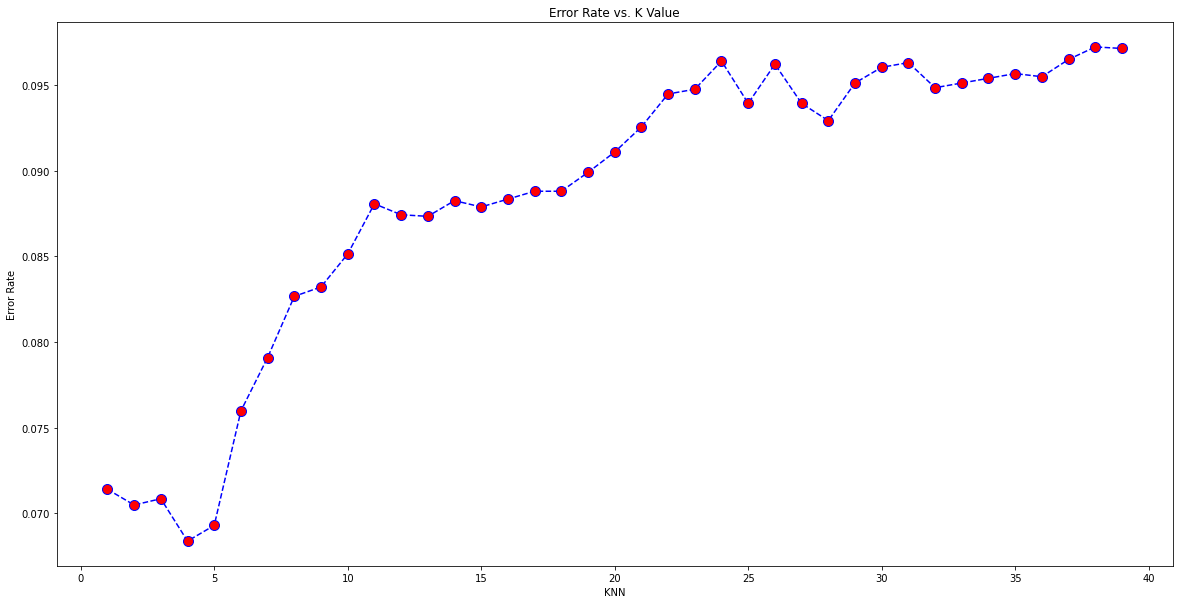

In [60]:
plt.figure(figsize=(20,10))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('KNN')
plt.ylabel('Error Rate')

# Support Vector Machine

In [61]:
svm = SVC(kernel='linear',C=1)

svm.fit(X_train, Y_train)

C:\Users\Danish Iqbal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, kernel='linear')

In [62]:
y= svm.predict(X_test)

y

array([1, 1, 1, ..., 1, 1, 1])

In [63]:
print("mean_absolute_error of SupportVectorMachine: ",  mean_absolute_error(Y_test ,y))
print("mean_squared_error of SupportVectorMachine: ",  mean_squared_error(Y_test , y))
print("Score of SupportVectorMachine: ",  svm.score(X_test,Y_test))
print("Sqaureroot of Mean_squared_error of SupportVectorMachine: ",  np.sqrt(mean_squared_error(Y_test , y)))

mean_absolute_error of SupportVectorMachine:  0.2755148741418764
mean_squared_error of SupportVectorMachine:  0.2755148741418764
Score of SupportVectorMachine:  0.7244851258581235
Sqaureroot of Mean_squared_error of SupportVectorMachine:  0.5248951077518978


In [64]:
svm.coef_

array([[-5.46716839e-04,  1.00486213e-05, -1.67415128e-05,
        -7.92730134e-07, -3.17101239e-07]])

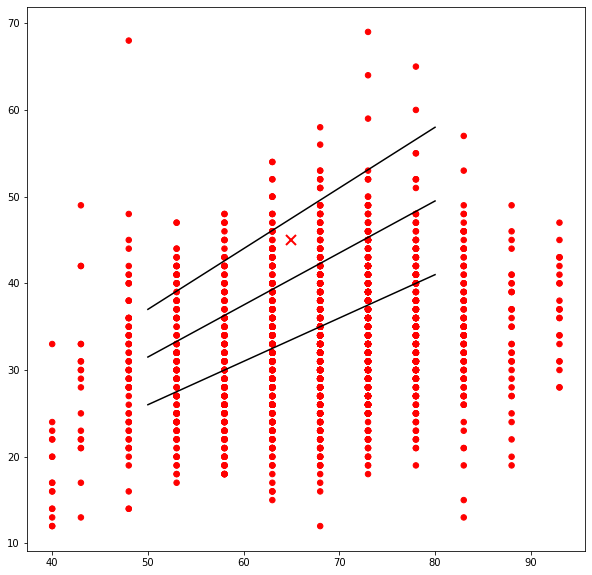

In [65]:
plt.figure(figsize= (10,10))

xfit = np.linspace(50, 80)
plt.scatter(X_test.iloc[:,2], X_test.iloc[:,3], c=y, s=30, cmap='autumn')
plt.plot([65], [45], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(0.5, 1), (0.6, 1.5), (0.7, 2)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.show()

# Naive Bayes

In [66]:
nb = GaussianNB()
nb.fit(X_train, Y_train)

nbpred = pd.DataFrame(nb.predict(X_test))

C:\Users\Danish Iqbal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [67]:
print("mean_absolute_error of Naive Bayes: ",  mean_absolute_error(Y_test ,nbpred))
print("mean_squared_error of Naive Bayes: ",  mean_squared_error(Y_test , nbpred))
print("Score of Naive Bayes: ",  nb.score(X_test,Y_test))
print("Sqaureroot of Mean_squared_error of Naive Bayes: ",  np.sqrt(mean_squared_error(Y_test , nbpred)))

mean_absolute_error of Naive Bayes:  0.2814645308924485
mean_squared_error of Naive Bayes:  0.2814645308924485
Score of Naive Bayes:  0.7185354691075515
Sqaureroot of Mean_squared_error of Naive Bayes:  0.5305323089996014
